In [13]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
# Read in the data
breastCancer = pd.read_csv("breast-cancer.csv")
breastCancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [15]:
# Clean the data
diagnosis_num = {'B':0, 'M':1}
breastCancer['diagnosis'] = breastCancer['diagnosis'].map(diagnosis_num)
breastCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
# Preprocessing data
features = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
x_train, x_test, y_train, y_test = train_test_split(breastCancer[features], breastCancer['diagnosis'],  test_size=.3)

In [31]:
# NOTE: INCLUDE IN PRESENTATION HOW ACTIVATION FUNCTION WAS CHOSEN AND HOW IT WAS USED.
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(21,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [33]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [34]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                      loss=losses.binary_crossentropy,
                      metrics=[metrics.Accuracy()]) 

In [35]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 10, epochs = 20, verbose = 1, validation_data=(x_test, y_test))

Epoch 1/20
40/40 [==============================] - 0s 4ms/step - loss: 0.6337 - acc: 0.6633 - val_loss: 0.6945 - val_acc: 0.5497
Epoch 2/20
40/40 [==============================] - 0s 1ms/step - loss: 0.6203 - acc: 0.6633 - val_loss: 0.6826 - val_acc: 0.5497
Epoch 3/20
40/40 [==============================] - 0s 1ms/step - loss: 0.6117 - acc: 0.6633 - val_loss: 0.6684 - val_acc: 0.5497
Epoch 4/20
40/40 [==============================] - 0s 1ms/step - loss: 0.6037 - acc: 0.6633 - val_loss: 0.6508 - val_acc: 0.5497
Epoch 5/20
40/40 [==============================] - 0s 1ms/step - loss: 0.6009 - acc: 0.6633 - val_loss: 0.6505 - val_acc: 0.5497
Epoch 6/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5821 - acc: 0.6633 - val_loss: 0.6108 - val_acc: 0.5497
Epoch 7/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5699 - acc: 0.6633 - val_loss: 0.5853 - val_acc: 0.5497
Epoch 8/20
40/40 [==============================] - 0s 1ms/step - loss: 0.5546 - acc: 0.68

In [36]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

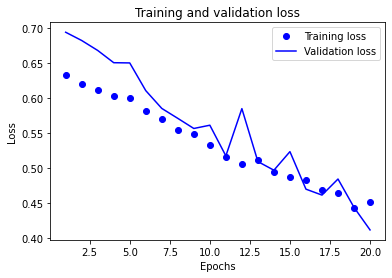

In [37]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

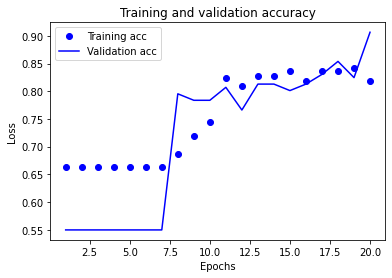

In [38]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()